<a href="https://colab.research.google.com/github/MuhammadBasilKhan/face-Identification-model-/blob/master/Identificationmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
data_dir = '/content/drive/MyDrive/drive/Basilface detection model/Basil detection model'

img_size = (224, 224)

batch_size = 32

In [ ]:
train_data_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_data_gen = ImageDataGenerator(rescale=1./255)


In [ ]:
x = []
y = []
for label, folder_name in enumerate(['Another_person','Basil_khan']):
    folder_path = os.path.join(data_dir, folder_name)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            x.append(img)
            y.append(label)

In [ ]:
x = np.array(x)
y = np.array(y)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, stratify=y)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_data_gen.flow(x_train, y_train, batch_size=batch_size),
                    validation_data=val_data_gen.flow(x_val, y_val),
                    epochs=15, verbose=1)

Epoch 1/15
148/148 [==============================] - 66s 379ms/step - loss: 0.2397 - accuracy: 0.9012 - val_loss: 0.0670 - val_accuracy: 0.9609
Epoch 2/15
148/148 [==============================] - 59s 397ms/step - loss: 0.0566 - accuracy: 0.9768 - val_loss: 0.0197 - val_accuracy: 0.9949
Epoch 3/15
148/148 [==============================] - 58s 393ms/step - loss: 0.0551 - accuracy: 0.9813 - val_loss: 0.0264 - val_accuracy: 0.9915
Epoch 4/15
148/148 [==============================] - 56s 376ms/step - loss: 0.0632 - accuracy: 0.9785 - val_loss: 0.0124 - val_accuracy: 0.9983
Epoch 5/15
148/148 [==============================] - 60s 408ms/step - loss: 0.0535 - accuracy: 0.9819 - val_loss: 0.0266 - val_accuracy: 0.9941
Epoch 6/15
148/148 [==============================] - 58s 392ms/step - loss: 0.0307 - accuracy: 0.9890 - val_loss: 0.0101 - val_accuracy: 0.9949
Epoch 7/15
148/148 [==============================] - 56s 381ms/step - loss: 0.0150 - accuracy: 0.9941 - val_loss: 0.0112 - val_ac

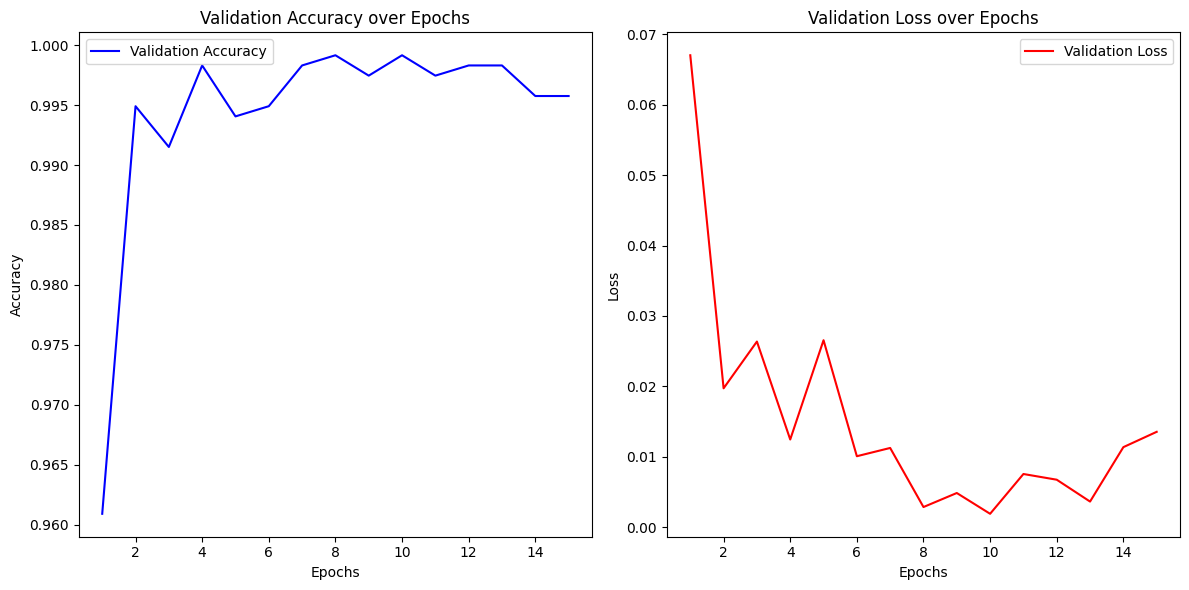

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the History object returned by model.fit
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(1, len(val_acc) + 1)

plt.figure(figsize=(12, 6))

# Plot validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model.save('Basilfacedetection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#for colab
import cv2
import numpy as np
from keras.models import load_model
from google.colab.patches import cv2_imshow

# Load the trained model
model = load_model('/content/Basilfacedetection.h5')

# Set the size of the input images
img_size = (224, 224)

# Class labels
class_labels = ['Another_person','Basil_khan']

def preprocess_image(img_path):
    """Preprocess the input image to the required size and normalize it."""
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError("Image not found or unable to read the image.")
    img = cv2.resize(img, img_size)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict_image(img_path):
    """Predict the class of the input image and display the image with the predicted class name."""
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    predicted_class = class_labels[int(prediction[0][0] > 0.70)]

    # Display the image with the predicted class name
    original_img = cv2.imread(img_path)
    cv2.putText(original_img, predicted_class, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2_imshow(original_img)  # Use cv2_imshow instead of cv2.imshow

# Example usage
img_path = '/content/drive/MyDrive/drive/Basilface detection model/Basil detection model/Basil_khan/IMG_20240716_171450_Burst20.jpg'
predict_image(img_path)